<a href="https://colab.research.google.com/github/ShreyB2091/PClub_Recruitment_Task/blob/main/Single_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

# Creating the data sets

In [ ]:
data = pd.read_csv('Surgical-deepnet.csv')
rows = data.shape[0]

x = data.head(int((rows / 3) * 2) + 1)
test_data = data.tail(int(rows / 3))

y = np.array(x['complication']).reshape((1,len(x)))
x = x.drop(columns = ['complication'])
x = x.T
target = test_data['complication']

# Displaying first 10 features of the data
x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,9747,9748,9749,9750,9751,9752,9753,9754,9755,9756
bmi,27.48,23.08,39.74,26.33,28.98,21.07,60.0,44.5,31.32,25.76,...,28.98,26.71,28.98,34.29,29.71,25.56,21.82,28.98,37.33,31.63
Age,60.50,58.70,51.30,72.70,90.00,32.70,57.2,59.6,40.60,39.70,...,90.00,72.50,90.00,58.00,56.30,84.80,71.20,90.00,55.80,43.60
asa_status,1.00,1.00,1.00,1.00,1.00,0.00,0.0,1.0,0.00,0.00,...,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
baseline_cancer,0.00,1.00,0.00,1.00,0.00,0.00,0.0,1.0,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
baseline_charlson,1.00,2.00,1.00,1.00,0.00,1.00,2.0,3.0,0.00,0.00,...,0.00,1.00,0.00,0.00,3.00,1.00,8.00,0.00,0.00,0.00
baseline_cvd,0.00,1.00,1.00,1.00,1.00,0.00,1.0,1.0,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
baseline_dementia,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
baseline_diabetes,0.00,0.00,1.00,0.00,0.00,0.00,0.0,1.0,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
baseline_digestive,1.00,1.00,0.00,1.00,0.00,0.00,1.0,0.0,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
baseline_osteoart,0.00,0.00,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00


In [ ]:
# Activation function
def Sigmoid(Z):
  return (1 / (1 + np.exp(-Z)))

# Derivative of the sigmoid function to used in back propagation
def dSigmoid(Z):
  s = 1/(1 + np.exp(-Z))
  dZ = s * (1 - s)
  return dZ

# Creating a class to initialize the network

In [ ]:
class nnetwork:
  def __init__(self, x, y, lr, n_hidden):
    self.X = x
    self.Y = y
    self.output = np.zeros((1, len(self.Y)))
    self.dims = [x.shape[0], n_hidden, 1]

    self.param = {}
    self.ch = {}
    self.grad = {}
    self.cost = []

    self.learning_rate = lr
    self.samples = self.Y.shape[1]

  def initialize_parameters(self):
    self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
    self.param['b1'] = np.zeros((self.dims[1], 1))        
    self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
    self.param['b2'] = np.zeros((self.dims[2], 1))                
    return

  def forward(self):    
    Z1 = np.dot(self.param['W1'], self.X) + self.param['b1'] 
    A1 = np.tanh(Z1)
    self.ch['Z1'], self.ch['A1'] = Z1, A1

    Z2 = np.dot(self.param['W2'], A1) + self.param['b2']  
    A2 = Sigmoid(Z2)
    self.ch['Z2'], self.ch['A2'] = Z2, A2

    self.output = A2
    cost = self.calc_cost(A2)
    return (self.output, cost)

  def calc_cost(self, output):
    cost = (1.0 / self.samples) * (-np.dot(self.Y, np.log(output).T) - np.dot(1 - self.Y, np.log(1 - output).T))    
    return cost

  def backward(self):
    dLoss_output = - (np.divide(self.Y, self.output ) - np.divide(1 - self.Y, 1 - self.output))
    dLoss_Z2 = dLoss_output * dSigmoid(self.ch['Z2'])
    dLoss_A1 = np.dot(self.param["W2"].T, dLoss_Z2)
    dLoss_W2 = (1.0 / self.ch['A1'].shape[1]) * np.dot(dLoss_Z2, self.ch['A1'].T)
    dLoss_b2 = (1.0 / self.ch['A1'].shape[1]) * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1]))
    dLoss_Z1 = np.dot(self.param["W2"].transpose(), dLoss_Z2) / (np.cosh(self.ch['Z1']) * np.cosh(self.ch['Z1']))
    dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
    dLoss_W1 = (1.0 / self.X.shape[1]) * np.dot(dLoss_Z1,self.X.T)
    dLoss_b1 = (1.0 / self.X.shape[1]) * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))

    self.param["W1"] = self.param["W1"] - self.learning_rate * dLoss_W1
    self.param["b1"] = self.param["b1"] - self.learning_rate * dLoss_b1
    self.param["W2"] = self.param["W2"] - self.learning_rate * dLoss_W2
    self.param["b2"] = self.param["b2"] - self.learning_rate * dLoss_b2

  def model(self, target, epochs):
    self.initialize_parameters()

    for i in range(0, epochs):
      (output, cost) = self.forward()
      output = output > 0.5
      self.backward()

      if i % (epochs / 10) == 0:
        print("\n========== Epoch", i,"==========")
        print("Cost after iteration %i: %f" %(i, cost))
        accuracy = np.mean(target == output)
        print("Accuracy: ", accuracy)
      self.cost.append(float(cost))
    return

In [ ]:
# nn = nnetwork(x, y, learning rate)
nn = nnetwork(x, y, 0.02, 30)

# nn.model(y, number of interations)
nn.model(y, 5000)


========== Epoch 0 ==========
Cost after iteration 0: 0.624552
Accuracy:  0.7497181510710259

========== Epoch 500 ==========
Cost after iteration 500: 0.491708
Accuracy:  0.7547401865327458

========== Epoch 1000 ==========
Cost after iteration 1000: 0.469082
Accuracy:  0.7648867479758122

========== Epoch 1500 ==========
Cost after iteration 1500: 0.455718
Accuracy:  0.7693963308393974

========== Epoch 2000 ==========
Cost after iteration 2000: 0.450143
Accuracy:  0.774623347340371

========== Epoch 2500 ==========
Cost after iteration 2500: 0.447351
Accuracy:  0.7779030439684329

========== Epoch 3000 ==========
Cost after iteration 3000: 0.444371
Accuracy:  0.7816951931946295

========== Epoch 3500 ==========
Cost after iteration 3500: 0.441234
Accuracy:  0.7827200983908988

========== Epoch 4000 ==========
Cost after iteration 4000: 0.437583
Accuracy:  0.7852823613815723

========== Epoch 4500 ==========
Cost after iteration 4500: 0.434913
Accuracy:  0.787229681254484


# Error Plot

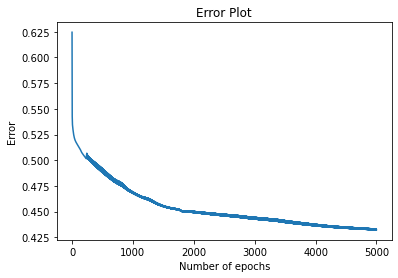

In [ ]:
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(nn.cost)
plt.show()